In [2]:
import os
import json
import ast
import pandas as pd
import matplotlib as plt

In [4]:
folder_path = 'demographic_data'
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
dataframes = []

for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
filtered_df = combined_df[combined_df['Status'] == "APPROVED"]

filtered_df.to_csv('demographic_combined.csv', index=False)

print("All files have been combined into 'demographic_combined.csv'.")

All files have been combined into 'demographic_combined.csv'.


In [40]:
# Load the first CSV file and extract unique values
file1_path = "denseSubset_all.csv"  # Replace with your actual file path
df1 = pd.read_csv(file1_path)

df1["participent_id_list"] = df1["participent_id"].apply(ast.literal_eval)  # Convert string to list
unique_values = set(item for sublist in df1["participent_id_list"] for item in sublist)

print(len(unique_values))
# Load the second CSV file
file2_path = "demographic_combined.csv"  # Replace with your actual file path
df2 = pd.read_csv(file2_path)

# Filter the second dataframe based on unique values from the first file
filtered_df = df2[df2["Participant id"].isin(unique_values)]

# Save the filtered data to a new CSV file
filtered_df.to_csv("filtered_demographic.csv", index=False)

# Display filtered data
print(filtered_df)

1853
                 Submission id            Participant id    Status  \
11    66e3639f0ec61aeee8b66fc4  5c686a5e77b2860001752a61  APPROVED   
15    67662d34d4c469876a2c5525  669bbdcdb3fe0784d521b666  APPROVED   
16    67662d3c3edcb9fc930b7935  5ec87daedce2260008f5c0d3  APPROVED   
18    67662dd02dde32ea7b0b59ef  673b25f4fc8a81345363741e  APPROVED   
19    67662dec1655641b93a2d6bf  6110a4e91e5bc7a89d9ac722  APPROVED   
...                        ...                       ...       ...   
1945  673d768b9b7076ea013a018f  671a75730f099b1793f93951  APPROVED   
1946  673d796069b41a42a1fa9d21  672f9ea5879c7e9e8a73398f  APPROVED   
1947  673d797b83c953b693453be6  6734010bda95d208801d15b0  APPROVED   
1948  673d81efabfeebf0f1ac3ded  672864f4d190dad96fcdc6e6  APPROVED   
1949  673d9188e7ba7b58595082a6  6731fbcdb6e9972cb47888ba  APPROVED   

     Custom study tncs accepted at                   Started at  \
11                  Not Applicable  2024-09-12T21:56:52.332000Z   
15                  

In [44]:
folder_path = 'postSurvey'
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
dataframes = []

for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    
    # Ensure "exit" column exists before filtering
    if "exitSurvey" in df.columns:
        df = df.dropna(subset=["exitSurvey"])  # Remove rows where "exit" is NaN
        df = df[df["exitSurvey"].astype(str).str.strip() != ""]  # Remove rows where "exit" is empty
    
    dataframes.append(df)

# Combine all dataframes
combined_df = pd.concat(dataframes, ignore_index=True)

# Remove duplicate rows
combined_df = combined_df.drop_duplicates()

combined_df = combined_df[combined_df["participantIdentifier"].isin(unique_values)]

print (combined_df)

combined_df["exitSurvey"] = combined_df["exitSurvey"].apply(json.loads)

combined_df = combined_df.join(pd.json_normalize(combined_df["exitSurvey"]))

id_to_change = combined_df[combined_df["gender"].astype(str).str.strip() == "non-binary"]["participantIdentifier"]

filtered_df.loc[filtered_df["Participant id"].isin(id_to_change), "Sex"] = "non-binary"

                              id       ended              endedLastChangedAt  \
0     01JFKM7A7J6N3XZTX1DCJAJ28P  game ended  2024-12-21T03:42:52.327679442Z   
1     01JFKTAVB51SM1XJSBT816MQ7G  game ended  2024-12-21T06:15:13.810407672Z   
2     01JFKM6QEY170K66ZKX69T9CVJ  game ended  2024-12-21T03:57:27.686606361Z   
3     01JFKQ34730WS8QQHVKK41S8N7  game ended  2024-12-21T04:39:50.520352758Z   
5     01JFKKVER1EFTM6QM5EPM4VDCF  game ended  2024-12-21T03:39:08.389428059Z   
...                          ...         ...                             ...   
1902  01JF1M3DTJ2Y07175ZARW7X9P0  game ended  2024-12-14T04:23:55.495981257Z   
1903  01JF1NJHQV2WC6DSZ76E35M1E7  game ended   2024-12-14T04:29:35.11441223Z   
1904  01JF1J5MK0PBY39T2KQH0Z2HD8  game ended  2024-12-14T03:20:04.127337463Z   
1905  01JF1JFV5T3H28AW663XDK13NK  game ended  2024-12-14T04:15:15.945141574Z   
1906  01JF1V8P03SXGY5B7H82WSYJDN  game ended  2024-12-14T06:20:29.817117164Z   

      exitStep           exitStepLastCh

In [45]:
filtered_gender = combined_df[combined_df["gender"].astype(str).str.strip().ne("") & combined_df["gender"].notna()]["gender"]
print(filtered_gender)

sex_d = pd.DataFrame(filtered_gender.describe())
print(sex_d)

# Count of each category in the "gender" column
sex_c = filtered_gender.value_counts()
print("\nCount of each category in 'gender':")
print(sex_c)


# sex_d = pd.DataFrame(combined_df['gender'].describe(include='object'))
# print(sex_d)

# # Count of Each Category
# sex_c = combined_df['gender'].value_counts()
# print("\nCount of each category in 'Sex':")
# print(sex_c)

2       female
6       female
10      female
12      female
13      female
         ...  
1571    female
1572    female
1573    female
1575    female
1577    female
Name: gender, Length: 605, dtype: object
        gender
count      605
unique       3
top     female
freq       582

Count of each category in 'gender':
gender
female        582
non-binary     22
male            1
Name: count, dtype: int64


                      Nationality  Count
                    United States    930
                   United Kingdom    341
                           Canada    242
                          Nigeria    103
                            India     16
                            China     11
                      Philippines     11
                     DATA_EXPIRED      8
                         Pakistan      7
                          Ireland      6
                            Kenya      6
                       Bangladesh      5
                            Ghana      5
                           Poland      4
                           Turkey      4
                          Vietnam      3
                        Australia      3
                            Italy      3
                            Spain      2
                         Bulgaria      2
                           France      2
                         Zimbabwe      2
                          Germany      2
                

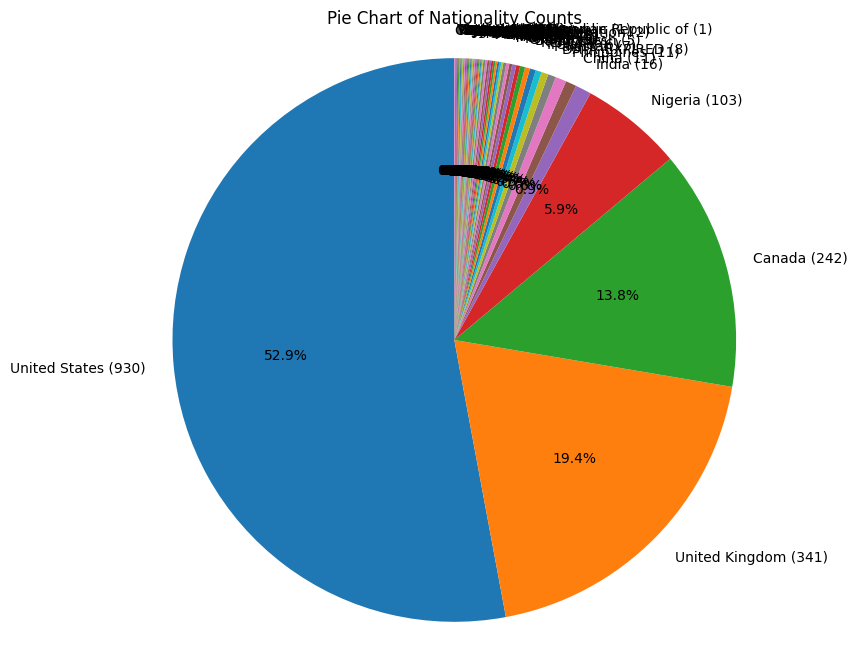

In [28]:
import matplotlib.pyplot as plt

file_path = 'filtered_demographic.csv'
# data = pd.read_csv(file_path)
data = filtered_df

# Choose the column to plot

value_counts = data['Nationality'].value_counts()

# Convert to DataFrame for tabular display
nationality_counts_df = value_counts.reset_index()
nationality_counts_df.columns = ["Nationality", "Count"]

# Display the count table
print(nationality_counts_df.to_string(index=False))  # Prints table in a readable format

# Generate the pie chart with counts in labels
plt.figure(figsize=(8, 8))
plt.pie(value_counts, 
        labels=[f"{idx} ({count})" for idx, count in zip(value_counts.index, value_counts.values)], 
        autopct='%1.1f%%', 
        startangle=90)

# Add title
plt.title('Pie Chart of Nationality Counts')
plt.axis('equal')  # Ensures the pie chart is circular

# Show the chart
plt.show()


   Ethnicity  Count
       White    946
       Black    364
       Asian    238
       Mixed    129
       Other     64
DATA_EXPIRED     16


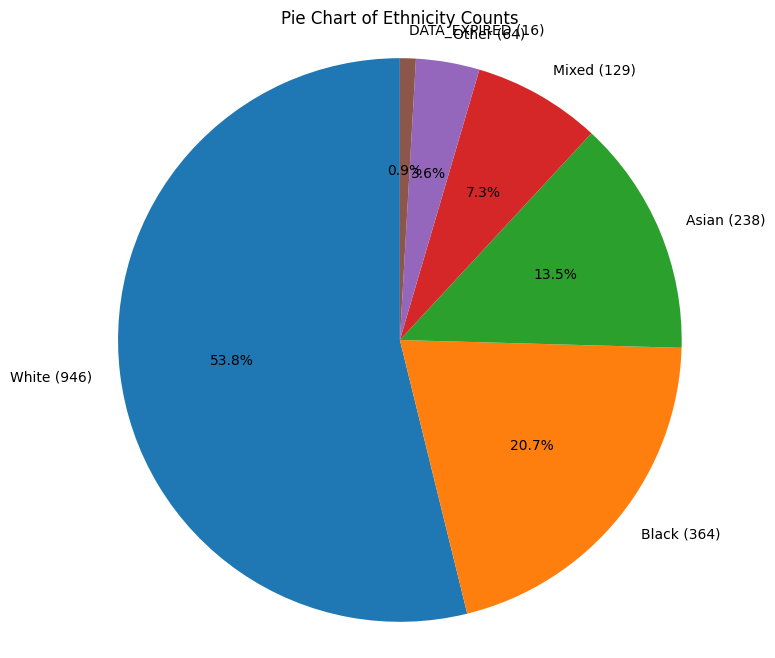

In [29]:
value_counts_eth = data['Ethnicity simplified'].value_counts()

# Convert to DataFrame
ethnicity_counts_df = value_counts_eth.reset_index()
ethnicity_counts_df.columns = ["Ethnicity", "Count"]

# Display the count table in the console
print(ethnicity_counts_df.to_string(index=False))  # Prints table in a readable format

# Generate the pie chart with counts in labels
plt.figure(figsize=(8, 8))
plt.pie(value_counts_eth, 
        labels=[f"{idx} ({count})" for idx, count in zip(value_counts_eth.index, value_counts_eth.values)], 
        autopct='%1.1f%%', 
        startangle=90)

# Add title
plt.title('Pie Chart of Ethnicity Counts')
plt.axis('equal')  # Ensures the pie chart is circular

# Show the chart
plt.show()

                                       Employment status  Count
                                               Full-Time    773
                                               Part-Time    348
                                            DATA_EXPIRED    254
                            Unemployed (and job seeking)    178
Not in paid work (e.g. homemaker', 'retired or disabled)    125
                                                   Other     67
            Due to start a new job within the next month     12


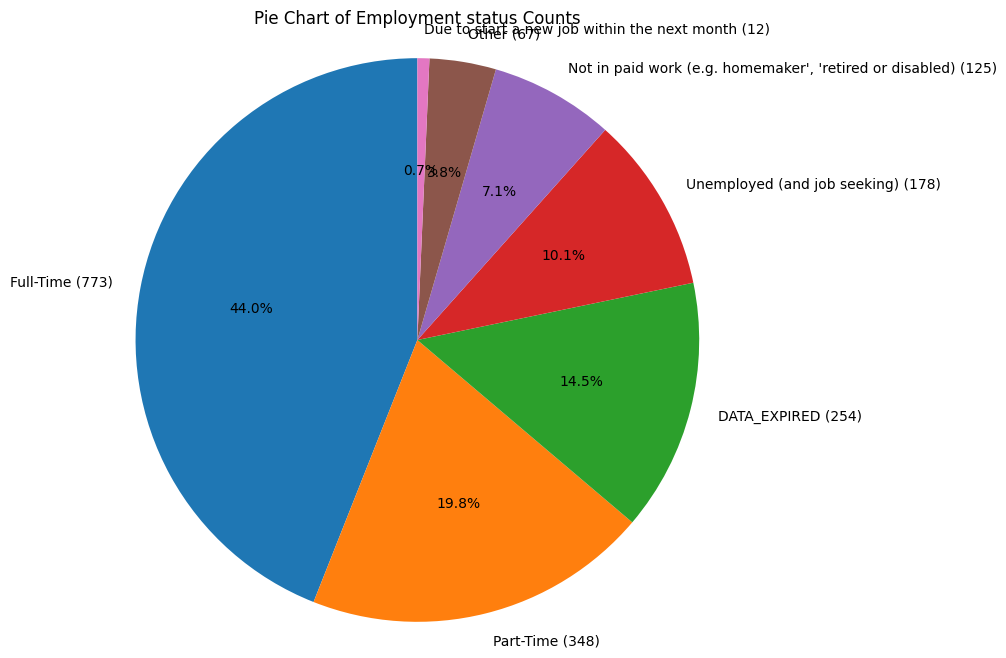

In [30]:
value_counts_emp = data['Employment status'].value_counts()

emp_counts_df = value_counts_emp.reset_index()
emp_counts_df.columns = ["Employment status", "Count"]

# Display the count table
print(emp_counts_df.to_string(index=False))  # Prints table in a readable format

# Generate the pie chart with counts in labels
plt.figure(figsize=(8, 8))
plt.pie(value_counts_emp, 
        labels=[f"{idx} ({count})" for idx, count in zip(value_counts_emp.index, value_counts_emp.values)], 
        autopct='%1.1f%%', 
        startangle=90)

# Add title
plt.title('Pie Chart of Employment status Counts')
plt.axis('equal')  # Ensures the pie chart is circular

# Show the chart
plt.show()

In [31]:
# print(pd.DataFrame(data['Sex'].describe(include='object')))

# General Description
sex_description = pd.DataFrame(data['Sex'].describe(include='object'))
print(sex_description)

# Count of Each Category
sex_counts = data['Sex'].value_counts()
print("\nCount of each category in 'Sex':")
print(sex_counts)

# Get Only Female Count
female_count = sex_counts.get('Female', 0)  # Default to 0 if 'Female' is missing
print(f"\nTotal Female Count: {female_count}")

         Sex
count   1757
unique     5
top     Male
freq     869

Count of each category in 'Sex':
Sex
Male                 869
Female               851
non-binary            22
Prefer not to say     12
DATA_EXPIRED           3
Name: count, dtype: int64

Total Female Count: 851


               Age
count  1757.000000
mean     35.161070
std      12.333156
min      18.000000
25%      26.000000
50%      32.000000
75%      42.000000
max     105.000000


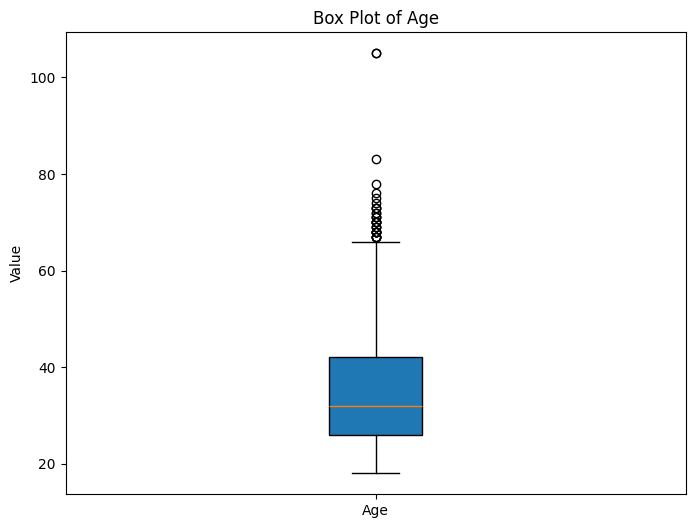

In [54]:
# print (data['Age'].describe)
print(pd.DataFrame(data['Age']).describe())
# print(type(data))
plt.figure(figsize=(8, 6))
plt.boxplot(data['Age'], vert=True, patch_artist=True, labels=['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Value')
plt.show()